<a href="https://colab.research.google.com/github/Nagmashaik123/INFO5502/blob/master/DataMiningNetflixShows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries numpy, pandas, matplotlib.pyplot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the netflix_titles.csv which contains the movies and tv shows details
df=pd.read_csv("/content/netflix_titles.csv")

In [4]:
# Creating df_shows for TV show type
df_shows=df[df['type']=='TV Show']

In [5]:
# Iterating and returning country in which the shows are created i.e content creating countries
df_shows['country'].head(50)


1                       South Africa
2                                NaN
3                                NaN
4                              India
5                                NaN
8                     United Kingdom
10                               NaN
11                               NaN
14                               NaN
15                     United States
17                            Mexico
19                               NaN
20                               NaN
21                            Turkey
25                         Australia
31                               NaN
32                    United Kingdom
33                               NaN
34                               NaN
37                           Finland
39                             India
40                     United States
47                               NaN
49                           Nigeria
50                             India
55                     United States
65                    United Kingdom
6

In [ ]:
# Iterating and returning the count of tv shows released in each country
countries1={}
df_shows['country']=df_shows['country'].fillna('Unknown') # eliminating country with unknown
cou1=list(df_shows['country'])
# Iterating for each country
for i in cou1:
    i=list(i.split(','))
    if len(i) == 1:
        print(countries1)
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [8]:
# Total no of countries which released the content over the platform
len(countries1)

103

In [10]:
countries1

{'': 1,
 ' Australia': 10,
 ' Azerbaijan': 1,
 ' Belgium': 3,
 ' Brazil': 3,
 ' Canada': 42,
 ' Chile': 1,
 ' China': 7,
 ' Colombia': 7,
 ' Cuba': 1,
 ' Czech Republic': 5,
 ' Denmark': 3,
 ' Egypt': 1,
 ' Finland': 1,
 ' France': 26,
 ' Germany': 19,
 ' Greece': 2,
 ' Hong Kong': 2,
 ' Hungary': 1,
 ' India': 3,
 ' Indonesia': 2,
 ' Ireland': 8,
 ' Israel': 1,
 ' Italy': 6,
 ' Japan': 25,
 ' Kuwait': 1,
 ' Lebanon': 1,
 ' Luxembourg': 1,
 ' Malaysia': 1,
 ' Malta': 1,
 ' Mexico': 10,
 ' Netherlands': 3,
 ' New Zealand': 6,
 ' Poland': 1,
 ' Russia': 2,
 ' Singapore': 5,
 ' South Africa': 5,
 ' South Korea': 6,
 ' Spain': 9,
 ' Sweden': 3,
 ' Syria': 1,
 ' United Kingdom': 26,
 ' United States': 91,
 ' West Germany': 2,
 'Argentina': 1,
 'Australia': 1,
 'Austria': 1,
 'Belarus': 1,
 'Belgium': 1,
 'Brazil': 1,
 'Canada': 1,
 'Chile': 1,
 'China': 1,
 'Colombia': 3,
 'Croatia': 1,
 'Cyprus': 1,
 'Czech Republic': 1,
 'Denmark': 1,
 'Egypt': 1,
 'Finland': 3,
 'France': 1,
 'Germany': 

In [11]:
# Iterating through and creating final key value pairs
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no

In [12]:
countries_fin1={k: v for k,v in sorted(countries_fin1.items(),key=lambda item: item[1], reverse= True)}

Text(0, 0.5, 'Arraival day in minutes')

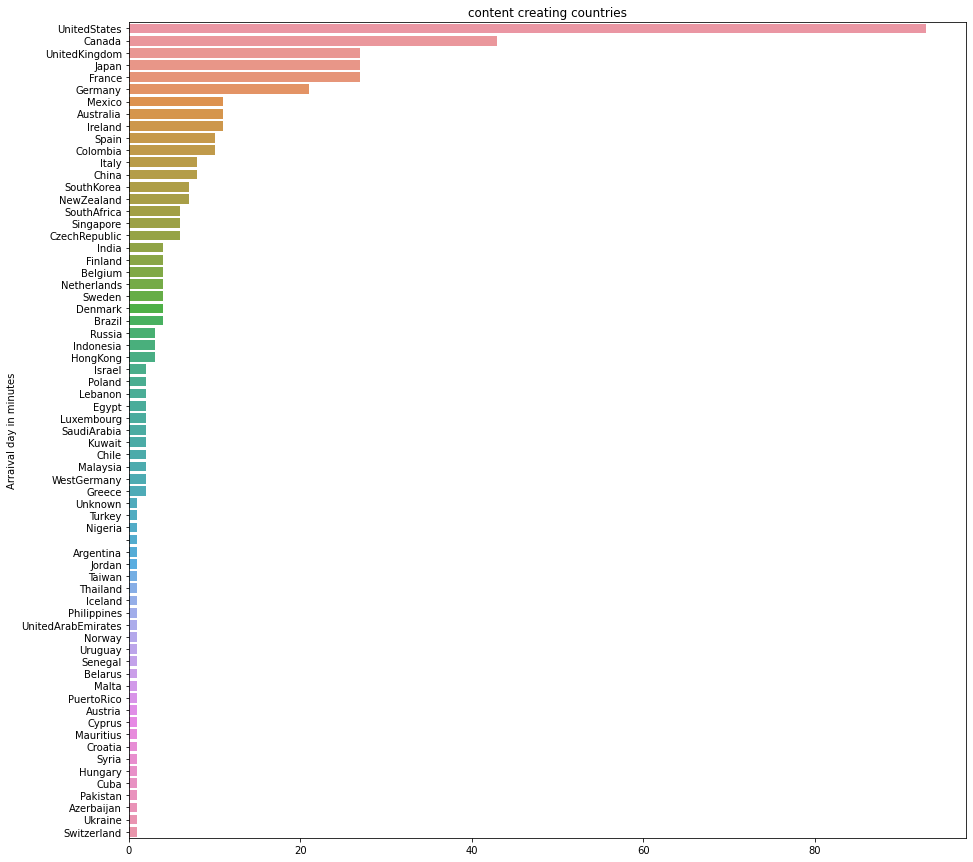

In [13]:
# Visually plotting the content creating countries to the arrival day in minutes
plt.figure(figsize=(15,15))
plt.title("content creating countries")
sns.barplot(y=list(countries_fin1.keys()),x=list(countries_fin1.values()))
plt.ylabel("Arraival day in minutes")

In [14]:
# Reading data set to fetch no of seasons and their corresponding durations
features=['title','duration']
durations=df_shows[features]
durations['no_of_seasons']=durations['duration'].str.replace('Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
# Returning no of seasons
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
t=['title','no_of_seasons']
top=durations[t]
top=top.sort_values(by='no_of_seasons',ascending=False)

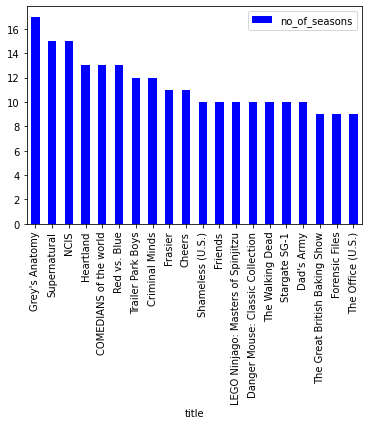

In [17]:
# Returning top twenty seasons for the visualisation analysis
top20=top[0:20]
top20.plot(kind='bar', x='title', y='no_of_seasons', color='blue')

In [18]:
# Also returning the shows with lowest number of seasons from the dataset
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]
# plotting grpah over the data
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(header=dict(values=['Title','No of seasons']),
                              cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()


In [20]:
# Reading and returning the series from the country United states
us_series_data=df_shows[df_shows['country']=='United States']

In [21]:
# Fetching the oldest series from the content released in United states based on release year
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

In [23]:
# Visually plotting the shows and their corresponding release year
fig=go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                             cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                   ])
fig.show()

In [24]:
# Fetching the newest series from the content released in United states based on release year
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]

In [25]:
# Visually plotting the recently released shows and their corresponding release year
fig=go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='Yellow'),
                             cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                   ])
fig.show()

In [26]:
netflix_fr=df[df['country']=='France']
nanef=netflix_fr.dropna()
import plotly.express as px
fig = px.treemap(nanef, path=['country','director'],color='director',hover_data=['director','title'],color_continuous_scale='purple')
fig.show()

TypeError: ignored